In [1]:
# these data set require to use customer segmentation by using rfm
# rfm is a approach where we use recency, frequency and monetary value to segement the customer 
# recency- latest purchase date- which can be calcuclated from date of purchase
# frequency- canbe calculated from invoice number
# monetary value- is sum of price
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwdb() 

b'C:\\Users\\Abhishekh\\shubham python'

In [3]:
df=pd.read_excel('C:\\Users\\Abhishekh\\Downloads\\E-com_Data.xlsx',header=0,index_col=None)

In [105]:
df2=pd.DataFrame.copy(df) # creating copy so that we don't have to load the doc again if anything goes wrong

In [106]:
df2.head() # checking head

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [107]:
df2.shape 

(537979, 12)

In [108]:
df2.duplicated().sum() # checking for exact duplicate 

9

In [109]:
df3=df2.drop_duplicates()# dropping those exact duplicate

In [110]:
df3.shape

(537970, 12)

In [111]:
# we only require customer who are giving profit
df3=df3.drop(['Cancelled_status','Reason of return','Sold as set'],axis=1)

In [112]:
df3.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [113]:
df3.isnull().sum() # count of null values

CustomerID           133789
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
dtype: int64

In [114]:
df4=df3.dropna(subset=['CustomerID']) # we are dropping null values as we do not have client acess to impute null values 

In [115]:
df4.isnull().sum()# just checking weather the code exucted properly

CustomerID           0
Item Code            0
InvoieNo             0
Date of purchase     0
Quantity             0
Time                 0
price per Unit       0
Price                0
Shipping Location    0
dtype: int64

In [116]:
df4.shape

(404181, 9)

In [117]:
for i in df4.columns:
    print({i:df4[i].nunique()}) # we are checking number of unique value

{'CustomerID': 4349}
{'Item Code': 3659}
{'InvoieNo': 21591}
{'Date of purchase': 381}
{'Quantity': 267}
{'Time': 769}
{'price per Unit': 2648}
{'Price': 13350}
{'Shipping Location': 20}


In [118]:
df4.describe(include='all') # descriptive status of datafranme here we can see that there is 
#-ve price which means order are retuned or cancelled so we don't require that kind data

<ipython-input-118-944a56cbcac3>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df4.describe(include='all') # descriptive status of datafranme here we can see that there is


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
count,404181.000000,404181,404181.000000,404181,404181.000000,404181,404181.000000,404181.000000,404181
unique,NaN,3659,NaN,381,NaN,769,NaN,NaN,20
top,NaN,85123A,NaN,2017-11-24 00:00:00,NaN,13:35:00,NaN,NaN,Location 36
freq,NaN,2064,NaN,2522,NaN,1834,NaN,NaN,376345
first,NaN,NaN,NaN,2016-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2181.897630,NaN,385648.273397,NaN,11.478669,NaN,341.450009,2474.139920,NaN
std,1252.681271,NaN,13107.396221,NaN,29.489919,NaN,427.242005,4891.388347,NaN
min,2.000000,NaN,361429.000000,NaN,-152.000000,NaN,2.000000,-10152.000000,NaN
25%,1207.000000,NaN,374194.000000,NaN,2.000000,NaN,158.000000,555.000000,NaN


In [119]:
df5=df4[df4['Price']>0]# we just require profit so deleting -ve price

In [120]:
df5.describe(include='all') # so here we can see taht consist of +ve value

<ipython-input-120-c02ae71e5406>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df5.describe(include='all') # so here we can see taht consist of +ve value


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
count,395998.000000,395998,395998.000000,395998,395998.000000,395998,395998.000000,395998.000000,395998
unique,NaN,3637,NaN,381,NaN,737,NaN,NaN,20
top,NaN,85123A,NaN,2017-11-24 00:00:00,NaN,13:35:00,NaN,NaN,Location 36
freq,NaN,2024,NaN,2485,NaN,1823,NaN,NaN,368829
first,NaN,NaN,NaN,2016-12-02 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-19 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2186.423482,NaN,385683.406209,NaN,11.822648,NaN,338.627140,2554.930656,NaN
std,1252.325963,NaN,13107.505659,NaN,29.667004,NaN,424.303919,4903.426736,NaN
min,2.000000,NaN,361429.000000,NaN,1.000000,NaN,2.000000,12.000000,NaN
25%,1212.000000,NaN,374298.000000,NaN,2.000000,NaN,157.000000,598.000000,NaN


In [121]:
df5.shape # so now we are left with (395998, 9)

(395998, 9)

In [122]:
#df5.duplicated(subset=['InvoieNo']).sum()

In [123]:
# recency= latest date-last purchase date, frequency= number of unique of invoice no.of transaction(s), monetary= sum of total amount for each customer
# here we are taking sum of prices for particular customer id and invoice number as nunique
import datetime as dt
PRESENT=dt.datetime(2017,12,20)

rfm= df5.groupby('CustomerID').agg({'Date of purchase': lambda date: (PRESENT - date.max()).days,
                                        'InvoieNo': lambda num: num.nunique(),
                                        'Price': lambda price: price.sum()})

In [124]:
rfm.columns # columns have different name

Index(['Date of purchase', 'InvoieNo', 'Price'], dtype='object')

In [125]:
rfm.columns=['recency','frequency','monetary'] # renaming the column

In [126]:
rfm.head() # just hecking head weather the imputation has done

,recency,frequency,monetary
CustomerID,,,
2.0,4,7,553704.0
3.0,77,4,257404.0
4.0,19,1,176613.0
5.0,311,1,41976.0
6.0,37,7,166972.0


In [127]:
rfm.reset_index() # reseting the index

,CustomerID,recency,frequency,monetary
0,2.0,4,7,553704.0
1,3.0,77,4,257404.0
2,4.0,19,1,176613.0
3,5.0,311,1,41976.0
4,6.0,37,7,166972.0
...,...,...,...,...
4319,4368.0,278,1,20480.0
4320,4369.0,181,1,10774.0
4321,4370.0,9,2,25177.0
4322,4371.0,4,16,280608.0


C:\Users\Abhishekh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhishekh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Abhishekh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

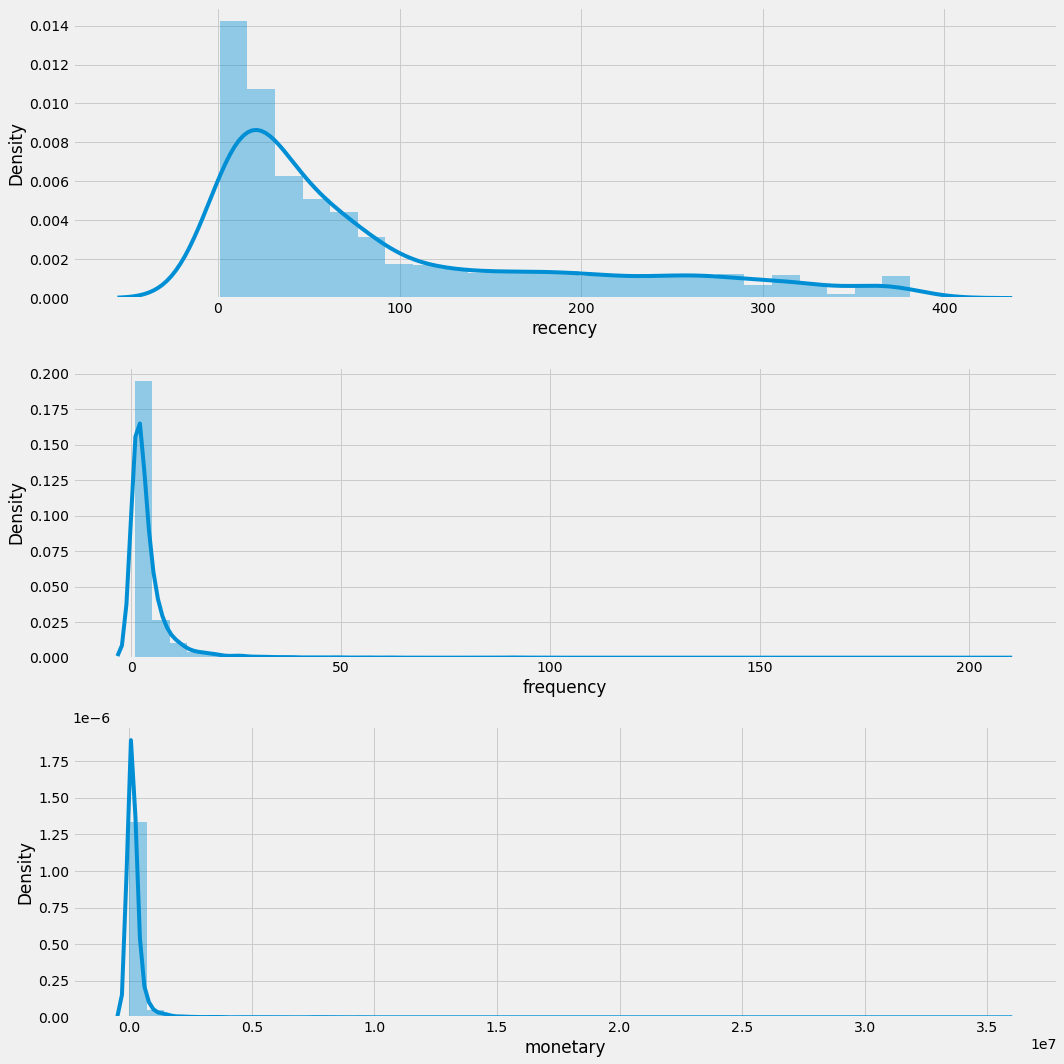

In [128]:
import seaborn as sns # checking for skewness in data
# plot the distribution of RFM values
f,ax = plt.subplots(figsize=(15, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm.recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.monetary, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show() # as we can see there is skewness in data

In [129]:
from scipy.stats import skew # treating skewness
#finding the skewness in each variable
data_num_skew = rfm.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
rfm[data_num_skewed.index] = np.log1p(rfm[data_num_skewed.index]) 

recency       1.244500
frequency    12.155432
monetary     22.360387
dtype: float64
recency       1.244500
frequency    12.155432
monetary     22.360387
dtype: float64


In [130]:
rfm.describe(include='all')

,recency,frequency,monetary
count,4324.000000,4324.000000,4324.000000
mean,3.882934,1.341089,11.429037
std,1.281343,0.681077,1.245210
min,0.693147,0.693147,5.963579
25%,2.995732,0.693147,10.578700
50%,3.970292,1.098612,11.363822
75%,4.971543,1.791759,12.258830
max,5.945421,5.332719,17.386062


In [131]:
quantiles = rfm.quantile(q=[0.25,0.50,0.75]) # here we are segarting the data on the basis of quantile 
# so that data will be properly distrbuted acording to values this we are doing to calculate 
#R_quartile, F_quartile , and M_quartile
quantiles = quantiles.to_dict()

In [132]:
def RScore(x,p,d):  # so here we are going from decreasing order to increasing order because because less recency 
    #better customer because he has purcase recently
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):# so here we are going from increasing order to decreasing order  because more frequency and monetary
    #better customer
    if x <= d[p][0.25]:         
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [133]:
rfm['r_quartile'] = rfm['recency'].apply(RScore, args=('recency',quantiles)) # apply quartile to recency frequence and monetary
rfm['f_quartile'] = rfm['frequency'].apply(FMScore, args=('frequency',quantiles))
rfm['m_quartile'] = rfm['monetary'].apply(FMScore, args=('monetary',quantiles))

In [134]:
rfm.reset_index()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
0,2.0,1.609438,2.079442,13.224387,1,1,1
1,3.0,4.356709,1.609438,12.458406,3,2,1
2,4.0,2.995732,0.693147,12.081722,1,4,2
3,5.0,5.743003,0.693147,10.644877,4,4,3
4,6.0,3.637586,2.079442,12.025587,2,1,2
...,...,...,...,...,...,...,...
4319,4368.0,5.631212,0.693147,9.927253,4,4,4
4320,4369.0,5.204007,0.693147,9.284984,4,4,4
4321,4370.0,2.302585,1.098612,10.133726,1,3,4
4322,4371.0,1.609438,2.833213,12.544718,1,1,1


In [135]:
rfm['RFM_Segment'] = rfm.r_quartile.map(str)+rfm.f_quartile.map(str)+rfm.m_quartile.map(str)
rfm.head() # creating rfm segement column so that we can make insight about best customer whose monetary value 

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment
CustomerID,,,,,,,
2.0,1.609438,2.079442,13.224387,1,1,1,111
3.0,4.356709,1.609438,12.458406,3,2,1,321
4.0,2.995732,0.693147,12.081722,1,4,2,142
5.0,5.743003,0.693147,10.644877,4,4,3,443
6.0,3.637586,2.079442,12.025587,2,1,2,212


In [136]:
print("best Customers: ",len(rfm[rfm['RFM_Segment']=='111'])) # some insight from refm segement
print('Loyal Customers: ',len(rfm[rfm['f_quartile']==1]))
print("Big Spenders: ",len(rfm[rfm['m_quartile']==1]))

best Customers:  465
Loyal Customers:  863
Big Spenders:  1081


As we can see here the best customer count is 465 whose rfm_segment is 111
for the customer whose frequency is 1 is very loyal customer due to good frequency 
we can detect big spender too so that if we happen to have high value product we can target them

In [137]:
rfm['rfm_score']=rfm[['r_quartile','f_quartile','m_quartile']].sum(axis=1) # rfm score 

In [138]:
rfm['rfm_score'].unique()

array([ 3,  6,  7, 11,  5, 12, 10,  9,  8,  4], dtype=int64)

In [139]:
rfm=rfm.sort_values(by=['rfm_score'],ascending=True)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,rfm_score
CustomerID,,,,,,,,
2.0,1.609438,2.079442,13.224387,1,1,1,111,3
1968.0,2.397895,2.397895,12.274180,1,1,1,111,3
1976.0,1.791759,2.397895,12.738652,1,1,1,111,3
1977.0,2.833213,2.197225,13.251184,1,1,1,111,3
1981.0,2.397895,3.871201,14.716304,1,1,1,111,3


In [140]:
rfm.reset_index()

,CustomerID,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,rfm_score
0,2.0,1.609438,2.079442,13.224387,1,1,1,111,3
1,1968.0,2.397895,2.397895,12.274180,1,1,1,111,3
2,1976.0,1.791759,2.397895,12.738652,1,1,1,111,3
3,1977.0,2.833213,2.197225,13.251184,1,1,1,111,3
4,1981.0,2.397895,3.871201,14.716304,1,1,1,111,3
...,...,...,...,...,...,...,...,...,...
4319,3957.0,5.774552,0.693147,9.877298,4,4,4,444,12
4320,1210.0,5.669881,0.693147,10.424867,4,4,4,444,12
4321,2640.0,5.164786,0.693147,9.961237,4,4,4,444,12
4322,3519.0,5.117994,0.693147,9.821681,4,4,4,444,12


In [141]:
rfm.describe(include='all') # here we can see quantile of rfm score

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,rfm_score
count,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324.000000,4324,4324.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,60,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,465,NaN
mean,3.882934,1.341089,11.429037,2.490056,2.687789,2.500000,NaN,7.677845
std,1.281343,0.681077,1.245210,1.124514,1.145096,1.118163,NaN,2.888483
min,0.693147,0.693147,5.963579,1.000000,1.000000,1.000000,NaN,3.000000
25%,2.995732,0.693147,10.578700,1.000000,2.000000,1.750000,NaN,5.000000
50%,3.970292,1.098612,11.363822,2.000000,3.000000,2.500000,NaN,8.000000
75%,4.971543,1.791759,12.258830,3.250000,4.000000,3.250000,NaN,10.000000


In [142]:
x=rfm['rfm_score'] # those rfm score is very low are good customer and that whose rfm score is high are about to churn
Bins=[0,5,9,x.max()]# doing thses segregation on the assumption of quartile
Binlabels=['hig value','medium value','low value customer']
cateogries=pd.cut(x,Bins,labels=Binlabels)

In [143]:
print(cateogries.head())

CustomerID
2.0       hig value
1968.0    hig value
1976.0    hig value
1977.0    hig value
1981.0    hig value
Name: rfm_score, dtype: category
Categories (3, object): ['hig value' < 'medium value' < 'low value customer']


In [144]:
rfm['levels']=cateogries # creating new column in rfm an storing the value

In [145]:
rfm # checking weather the value is stored

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Segment,rfm_score,levels
CustomerID,,,,,,,,,
2.0,1.609438,2.079442,13.224387,1,1,1,111,3,hig value
1968.0,2.397895,2.397895,12.274180,1,1,1,111,3,hig value
1976.0,1.791759,2.397895,12.738652,1,1,1,111,3,hig value
1977.0,2.833213,2.197225,13.251184,1,1,1,111,3,hig value
1981.0,2.397895,3.871201,14.716304,1,1,1,111,3,hig value
...,...,...,...,...,...,...,...,...,...
3957.0,5.774552,0.693147,9.877298,4,4,4,444,12,low value customer
1210.0,5.669881,0.693147,10.424867,4,4,4,444,12,low value customer
2640.0,5.164786,0.693147,9.961237,4,4,4,444,12,low value customer


In [146]:
rfm.levels.value_counts()

medium value          1732
low value customer    1412
hig value             1180
Name: levels, dtype: int64

Suggested marketing strategies on segmented customers: high value Customers- Discounts, early access of new products, and loyalty programs.(RFM Score 3-5) medium value customer- Coupons or Cashback rewards, low delivery charges (RFM Score 6-9) low value customer- Aggresive price incentives (RFM Score 10-12)

In [147]:
#rfm.to_excel('saved_file.xlsx')

# now doing segregation using kmeans 

In [148]:
import seaborn as sns

In [149]:
import matplotlib.pyplot as plt

In [304]:
rfm_= rfm[['recency','frequency','monetary']]
print(rfm_.describe())

           recency    frequency     monetary
count  4324.000000  4324.000000  4324.000000
mean      3.882934     1.341089    11.429037
std       1.281343     0.681077     1.245210
min       0.693147     0.693147     5.963579
25%       2.995732     0.693147    10.578700
50%       3.970292     1.098612    11.363822
75%       4.971543     1.791759    12.258830
max       5.945421     5.332719    17.386062


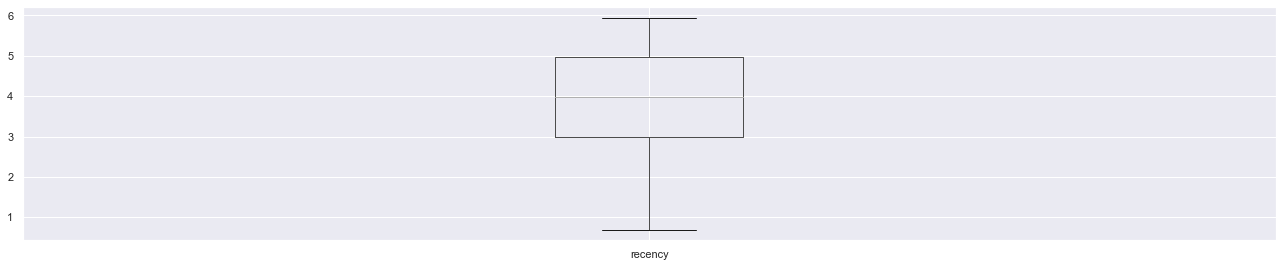

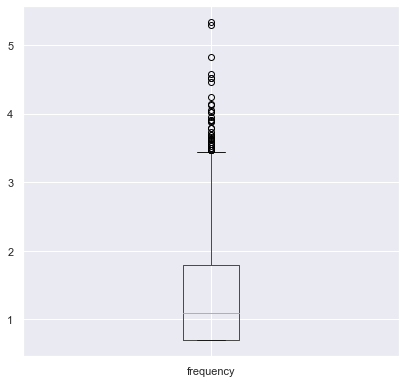

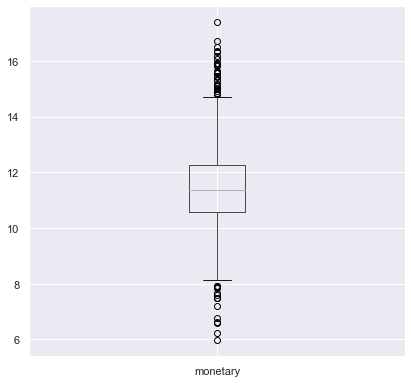

<Figure size 432x432 with 0 Axes>

In [312]:
#To find outliers in data
for x in rfm_.columns:
    rfm_.boxplot(column=x)
    plt.show()
    plt.figure(figsize= (6,6))

In [313]:
# for frequency treating outliers for frequency
q1 = rfm_['frequency'].quantile(0.25)
q3 = rfm_['frequency'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
high = q3+1.5*iqr #acceptable range # quartile range
print(high)

3.439677902230219


In [314]:
rfm_.loc[rfm_["frequency"] >high, "frequency"] = high

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [315]:
#for value in colname: treaing outliers for monetary
q1 = rfm_['monetary'].quantile(0.25) #first quartile value
q3 = rfm_['monetary'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range
print(low)
print(high)

8.058504756489594
14.779024940437349


In [316]:
rfm_.loc[rfm["monetary"] <low, "monetary"] = low
rfm_.loc[rfm["monetary"] >high, "monetary"] = high

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Abhishekh\anaconda3\lib\site-packages\pandas\core\indexing.py:

In [317]:
rfm_.describe(include='all')

,recency,frequency,monetary
count,4324.000000,4324.000000,4324.000000
mean,3.882934,1.336626,11.425677
std,1.281343,0.663995,1.215988
min,0.693147,0.693147,8.058505
25%,2.995732,0.693147,10.578700
50%,3.970292,1.098612,11.363822
75%,4.971543,1.791759,12.258830
max,5.945421,3.439678,14.779025


In [318]:
x=rfm_.values[:,0:2] # we are taking recency and frequency as in monetary value will not be that much helpfull 
# to segregrate the data and also we the customer is not frequent and adn recency is not good that means that the customer had 
# purcahse from us very long time back ant he/she may not purchase in future
# so either way we have caluclate the big spender above so we can chase them seperately

In [319]:
x

array([[1.60943791, 2.07944154],
       [2.39789527, 2.39789527],
       [1.79175947, 2.39789527],
       ...,
       [5.16478597, 0.69314718],
       [5.11799381, 0.69314718],
       [5.79909265, 0.69314718]])

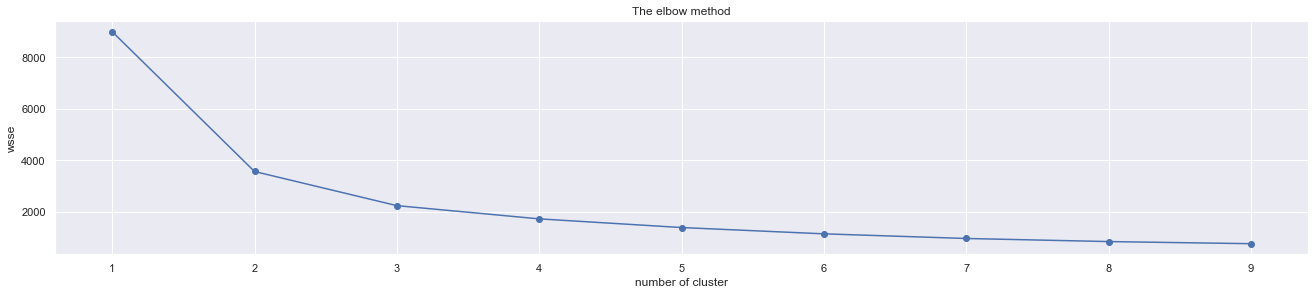

In [320]:
from sklearn.cluster import KMeans

wsse= []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=10)
    kmeans.fit(x)
    wsse.append(kmeans.inertia_) # within cluster sum off squared error
plt.plot(range(1,10),wsse)
plt.scatter(range(1,10),wsse)
plt.title('The elbow method')
plt.xlabel('number of cluster')
plt.ylabel('wsse')
plt.show()

In [321]:
print(wsse) # as we can see that after third point the values are not drastically getting checked

[9003.6365541046, 3571.077373096231, 2245.063100503939, 1730.8522866973312, 1394.2609219770745, 1149.391667439075, 969.0173101783079, 849.3511237688275, 766.6424556620854]


In [322]:
kmeans=KMeans(n_clusters=3, random_state=10)
y_pred=kmeans.fit_predict(x)

In [323]:
y_pred

array([1, 1, 1, ..., 2, 2, 2])

In [324]:
y_pred.shape

(4324,)

In [325]:
rfm_['Clusters']=y_pred
rfm_.head(10)# storing y_pred in rfm_

<ipython-input-325-41102d9e9ae9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,recency,frequency,monetary,Clusters
CustomerID,,,,
2.0,1.609438,2.079442,13.224387,1
1968.0,2.397895,2.397895,12.274180,1
1976.0,1.791759,2.397895,12.738652,1
1977.0,2.833213,2.197225,13.251184,1
1981.0,2.397895,3.439678,14.716304,1
451.0,2.397895,3.439678,14.573389,1
1987.0,2.484907,2.772589,13.447033,1
2000.0,1.791759,3.439678,14.779025,1
2014.0,2.197225,3.439678,14.034554,1


In [326]:
rfm_.Clusters.unique()

array([1, 0, 2])

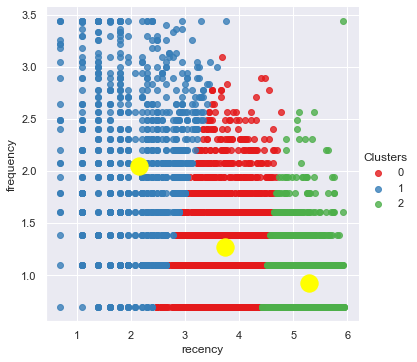

In [327]:
sns.lmplot(data=rfm_,x='recency',y='frequency',fit_reg=False,
          # no regression line
          hue='Clusters',palette='Set1')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s = 300, c = 'yellow')
plt.show()

In [328]:
rfm_['Clusters']=rfm_.Clusters.map({0:'medium value customer',1:'high value customer',2:'low value customer'})

<ipython-input-328-50f461651d7d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [329]:
rfm_

,recency,frequency,monetary,Clusters
CustomerID,,,,
2.0,1.609438,2.079442,13.224387,high value customer
1968.0,2.397895,2.397895,12.274180,high value customer
1976.0,1.791759,2.397895,12.738652,high value customer
1977.0,2.833213,2.197225,13.251184,high value customer
1981.0,2.397895,3.439678,14.716304,high value customer
...,...,...,...,...
3957.0,5.774552,0.693147,9.877298,low value customer
1210.0,5.669881,0.693147,10.424867,low value customer
2640.0,5.164786,0.693147,9.961237,low value customer


In [330]:
rfm_['Clusters'].value_counts()


medium value customer    1839
low value customer       1462
high value customer      1023
Name: Clusters, dtype: int64

In [331]:
rfm_cluster_agg = rfm_.groupby('Clusters').agg({'recency' :'mean',
                                       'frequency':'mean',
                                       'monetary':['mean','count']}).round(0)

In [332]:
print(rfm_cluster_agg)

                      recency frequency monetary      
                         mean      mean     mean count
Clusters                                              
high value customer       2.0       2.0     12.0  1023
low value customer        5.0       1.0     11.0  1462
medium value customer     4.0       1.0     11.0  1839


C:\Users\Abhishekh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



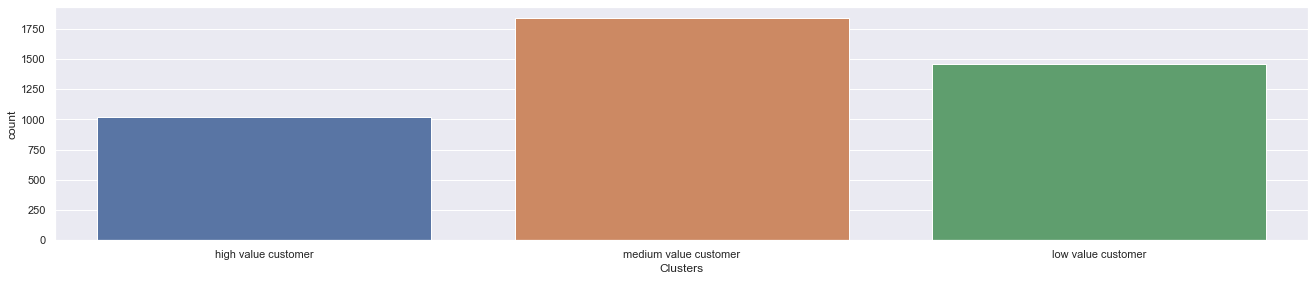

In [333]:
sns.countplot(rfm_['Clusters'])
sns.set(rc={"figure.figsize":(20, 4)})

In [ ]:
#rfm_.to_excel('customer_segmentation.xlsx')